# SVM

A notebook for demonstrating the SVM classifier on the 

In [5]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

### Dataset Setup

In [7]:
# Loading from URL to Pandas Dataframe.

# dataset URL
IRIS_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

print(
"""
Attributes in IRIS dataset (refer https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names):
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica
"""
)

# column names
COLUMN_NAMES = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe.
dataset = pd.read_csv(IRIS_URL, names=COLUMN_NAMES)

# verify loaded dataset
print('\nLoaded dataset in Pandas Dataframe:\n')
dataset.info()


Attributes in IRIS dataset (refer https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names):
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica


Loaded dataset in Pandas Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
print('Sample entries in dataset')
# first 5 entries
dataset.head(n=5)

Sample entries in dataset


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# dataset statistics 
def classwise_means(df):
    """Prints classwise averages for attributes present in the dataset (df)."""
    print('Classes in dataset: ')
    class_labels = df['Class'].unique()
    print(class_labels)
    print('\n')
    print('Class-wise Attribute Averages')
    print(df.groupby(['Class']).mean())

classwise_means(dataset)

Classes in dataset: 
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Class-wise Attribute Averages
                 sepal-length  sepal-width  petal-length  petal-width
Class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


### Dataset Preprocessing

In [11]:
# Split data into Features, Labels

# first 4 columns correspond to features, 5th column contains the class labels
X = dataset.iloc[:, :4].values
Y = dataset.iloc[:, 4].values

In [14]:
# Train-Test split

# Following an 80-20 split on data.
# The dataset is shuffled with a the random seed for reproducible results.

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=10, test_size=0.20)

print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

Number of train samples:  120
Number of test samples:  30


In [15]:
# Feature normalization
# Refer to https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Training and Predictions

#### SVM CLassifier

Theoretical equations and background of the SVM classifier. 

Explanation of parameters of the sklearn call

In [17]:
# Fit model to training data

# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [18]:
# Evaluate on test data 
y_pred = classifier.predict(X_test)

### Model Performance 

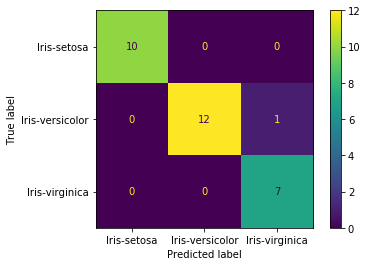

In [19]:
# Confusion Matrix
class_labels = dataset['Class'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

In [20]:
# Performance Statistics
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

